# Data Preprocessing on the IEEE CIS Fraud Detection Data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Table-and-feature-descriptions" data-toc-modified-id="Table-and-feature-descriptions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Table and feature descriptions</a></span><ul class="toc-item"><li><span><a href="#Transaction-table" data-toc-modified-id="Transaction-table-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Transaction table</a></span><ul class="toc-item"><li><span><a href="#TransactionDT:-timedelta-from-a-given-reference-datetime-(not-an-actual-timestamp)" data-toc-modified-id="TransactionDT:-timedelta-from-a-given-reference-datetime-(not-an-actual-timestamp)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>TransactionDT: timedelta from a given reference datetime (not an actual timestamp)</a></span></li><li><span><a href="#TransactionAMT:-transaction-payment-amount-in-USD" data-toc-modified-id="TransactionAMT:-transaction-payment-amount-in-USD-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>TransactionAMT: transaction payment amount in USD</a></span></li><li><span><a href="#ProductCD:-product-code,-the-product-for-each-transaction" data-toc-modified-id="ProductCD:-product-code,-the-product-for-each-transaction-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>ProductCD: product code, the product for each transaction</a></span></li><li><span><a href="#card1---card6:-payment-card-information,-such-as-card-type,-card-category,-issue-bank,-country,-etc." data-toc-modified-id="card1---card6:-payment-card-information,-such-as-card-type,-card-category,-issue-bank,-country,-etc.-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.</a></span></li><li><span><a href="#addr:-address" data-toc-modified-id="addr:-address-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>addr: address</a></span></li><li><span><a href="#dist:-distance" data-toc-modified-id="dist:-distance-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>dist: distance</a></span></li><li><span><a href="#C1-C14:-counting,-such-as-how-many-addresses-are-found-to-be-associated-with-the-payment-card,-etc.-The-actual-meaning-is-masked." data-toc-modified-id="C1-C14:-counting,-such-as-how-many-addresses-are-found-to-be-associated-with-the-payment-card,-etc.-The-actual-meaning-is-masked.-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.</a></span></li><li><span><a href="#D1-D15:-timedelta,-such-as-days-between-previous-transaction,-etc." data-toc-modified-id="D1-D15:-timedelta,-such-as-days-between-previous-transaction,-etc.-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>D1-D15: timedelta, such as days between previous transaction, etc.</a></span></li><li><span><a href="#M1-M9:-match,-such-as-names-on-card-and-address,-etc." data-toc-modified-id="M1-M9:-match,-such-as-names-on-card-and-address,-etc.-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>M1-M9: match, such as names on card and address, etc.</a></span></li><li><span><a href="#Vxxx:-Vesta-engineered-rich-features,-including-ranking,-counting,-and-other-entity-relations." data-toc-modified-id="Vxxx:-Vesta-engineered-rich-features,-including-ranking,-counting,-and-other-entity-relations.-2.1.10"><span class="toc-item-num">2.1.10&nbsp;&nbsp;</span>Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.</a></span></li><li><span><a href="#Categorical-Features:" data-toc-modified-id="Categorical-Features:-2.1.11"><span class="toc-item-num">2.1.11&nbsp;&nbsp;</span>Categorical Features:</a></span></li></ul></li><li><span><a href="#Identity-Table" data-toc-modified-id="Identity-Table-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Identity Table</a></span><ul class="toc-item"><li><span><a href="#Categorical-Features:" data-toc-modified-id="Categorical-Features:-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Categorical Features:</a></span></li></ul></li></ul></li><li><span><a href="#Labeling-logic" data-toc-modified-id="Labeling-logic-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Labeling logic</a></span></li><li><span><a href="#Explore-The-Data" data-toc-modified-id="Explore-The-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore The Data</a></span><ul class="toc-item"><li><span><a href="#Load-the-required-libraries" data-toc-modified-id="Load-the-required-libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load the required libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Start-by-exploring-the-shapes-of-the-dataframes" data-toc-modified-id="Start-by-exploring-the-shapes-of-the-dataframes-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Start by exploring the shapes of the dataframes</a></span></li><li><span><a href="#Merge-transaction-and-itentity-dataframes" data-toc-modified-id="Merge-transaction-and-itentity-dataframes-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Merge <code>transaction</code> and <code>itentity</code> dataframes</a></span></li><li><span><a href="#Verify-columns-match-in-train-and-test" data-toc-modified-id="Verify-columns-match-in-train-and-test-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Verify columns match in <code>train</code> and <code>test</code></a></span></li><li><span><a href="#Check-Unique-Values" data-toc-modified-id="Check-Unique-Values-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Check Unique Values</a></span></li><li><span><a href="#Check-for-Percent-of-Missing-Values-Over-20%" data-toc-modified-id="Check-for-Percent-of-Missing-Values-Over-20%-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Check for Percent of Missing Values Over 20%</a></span></li><li><span><a href="#Check-the-TARGET-distribution" data-toc-modified-id="Check-the-TARGET-distribution-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Check the TARGET distribution</a></span></li><li><span><a href="#Check-Delta-time-related-fields." data-toc-modified-id="Check-Delta-time-related-fields.-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Check Delta time related fields.</a></span></li><li><span><a href="#Check-the-D-features" data-toc-modified-id="Check-the-D-features-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Check the <code>D</code> features</a></span></li><li><span><a href="#Check-the-Card-features" data-toc-modified-id="Check-the-Card-features-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Check the <code>Card</code> features</a></span></li><li><span><a href="#Check-addr1,-addr2-features" data-toc-modified-id="Check-addr1,-addr2-features-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Check <code>addr1</code>, <code>addr2</code> features</a></span></li><li><span><a href="#Check-dist1,-dist2-features" data-toc-modified-id="Check-dist1,-dist2-features-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>Check <code>dist1</code>, <code>dist2</code> features</a></span></li><li><span><a href="#Check-P_emaildomain,-R_emaildomain-features" data-toc-modified-id="Check-P_emaildomain,-R_emaildomain-features-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>Check <code>P_emaildomain</code>, <code>R_emaildomain</code> features</a></span></li><li><span><a href="#Check-ProductCD-feature" data-toc-modified-id="Check-ProductCD-feature-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span>Check <code>ProductCD</code> feature</a></span></li><li><span><a href="#Check-C-features" data-toc-modified-id="Check-C-features-4.16"><span class="toc-item-num">4.16&nbsp;&nbsp;</span>Check <code>C</code> features</a></span></li><li><span><a href="#Check-M-features" data-toc-modified-id="Check-M-features-4.17"><span class="toc-item-num">4.17&nbsp;&nbsp;</span>Check <code>M</code> features</a></span></li><li><span><a href="#Check-id-features" data-toc-modified-id="Check-id-features-4.18"><span class="toc-item-num">4.18&nbsp;&nbsp;</span>Check <code>id</code> features</a></span></li><li><span><a href="#Check-DeviceType-feature" data-toc-modified-id="Check-DeviceType-feature-4.19"><span class="toc-item-num">4.19&nbsp;&nbsp;</span>Check <code>DeviceType</code> feature</a></span></li><li><span><a href="#Check-Deviceinfo-feature" data-toc-modified-id="Check-Deviceinfo-feature-4.20"><span class="toc-item-num">4.20&nbsp;&nbsp;</span>Check <code>Deviceinfo</code> feature</a></span></li><li><span><a href="#Check-V-features" data-toc-modified-id="Check-V-features-4.21"><span class="toc-item-num">4.21&nbsp;&nbsp;</span>Check <code>V</code> features</a></span></li></ul></li></ul></div>

## Introduction
In this notebook we begin to explore the data. The findings will be used later to clean the data and as a basis for a feature engineering strategy.
## Table and feature descriptions
The descriptions in this section come from this [discussion](https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#588953) on Kaggle.
### Transaction table
“It contains money transfer and also other gifting goods and service, like you booked a ticket for others, etc.”

#### TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
“TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.”

#### TransactionAMT: transaction payment amount in USD
“Some of the transaction amounts have three decimal places to the right of the decimal point. There seems to be a link to three decimal places and a blank addr1 and addr2 field. Is it possible that these are foreign transactions and that, for example, the 75.887 in row 12 is the result of multiplying a foreign currency amount by an exchange rate?”

#### ProductCD: product code, the product for each transaction
“Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.”

#### card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

#### addr: address
“both addresses are for purchaser
addr1 as billing region
addr2 as billing country”

#### dist: distance
"distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”
P_ and (R_) emaildomain: purchaser and recipient email domain “ certain transactions don't need recipient, so Remaildomain is null.”

#### C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
“Can you please give more examples of counts in the variables C1-15? Would these be like counts of phone numbers, email addresses, names associated with the user? I can't think of 15.
Your guess is good, plus like device, ipaddr, billingaddr, etc. Also these are for both purchaser and recipient, which doubles the number.”

#### D1-D15: timedelta, such as days between previous transaction, etc.

#### M1-M9: match, such as names on card and address, etc.

#### Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
“For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc.”
"All Vesta features were derived as numerical. some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking). I wouldn't recommend to treat any of them as categorical. If any of them resulted in binary by chance, it maybe worth trying."

#### Categorical Features:
ProductCD

card1 - card6

addr1, addr2

Pemaildomain Remaildomain

M1 - M9

### Identity Table
Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

DeviceInfo : https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#583227

“id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately.”

#### Categorical Features:
DeviceType

DeviceInfo

id12 - id38

## Labeling logic
"The logic of our labeling is define reported chargeback on the card as fraud transaction (isFraud=1) and transactions posterior to it with either user account, email address or billing address directly linked to these attributes as fraud too. If none of above is reported and found beyond 120 days, then we define as legit transaction (isFraud=0).
However, in real world fraudulent activity might not be reported, e.g. cardholder was unaware, or forgot to report in time and beyond the claim period, etc. In such cases, supposed fraud might be labeled as legit, but we never could know of them. Thus, we think they're unusual cases and negligible portion." Read more : https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#588953

## Explore The Data
### Load the required libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
import sys
import gc

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.fe_modeling import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from multiprocessing import pool
import dask.dataframe as dd
from IPython.display import Markdown, display

We want to be able to view all of the columns in the dataframes.

In [3]:
pd.set_option('display.max_columns', 500)

# Simple function for printing Markdown from code cells
def md(string):
    display(Markdown(string))

### Load the data
Using the `Dask` library to load the dataset. Dask parallelizes the task for us. The result is immediately computed and assigned to Pandas dataframes.

In [4]:
test_trans_df = dd.read_csv('../data/test_transaction.csv').compute()
test_id_df = dd.read_csv('../data/test_identity.csv').compute()
train_trans_df = dd.read_csv('../data/train_transaction.csv').compute()
train_id_df = dd.read_csv('../data/train_identity.csv').compute()

### Start by exploring the shapes of the dataframes

In [5]:
print(f'DataFrame Shapes:\n'
     f'-------------------\n'
     f'Test_Trans:  {test_trans_df.shape}\n'
     f'Test_Id:     {test_id_df.shape}\n'
     f'Train_Trans: {train_trans_df.shape}\n'
     f'Train_Id:    {train_id_df.shape}')
train_trans_df.head()

DataFrame Shapes:
-------------------
Test_Trans:  (506691, 393)
Test_Id:     (141907, 41)
Train_Trans: (590540, 394)
Train_Id:    (144233, 41)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [6]:
test_trans_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,T,F,F,M0,NaN,F,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [7]:
train_id_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
test_id_df.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


___
**<p>Relationship between the transaction table and the identity table</p>**<p></p>
It can be seen that there is a difference in the number of samples when comparing the `transaction tables` to the `identity tables`. This will need further exploring. Perhaps the identity feature is a subset of the transaction

In [9]:
md(f"Unique number of unique `TransactionID`s in `train_trans_df`: {train_trans_df['TransactionID'].nunique()}")
md(f"Unique number of unique `TransactionID`s in `train_id_df`: {train_id_df['TransactionID'].nunique()}")

###################################################################
# Use set operation to find if identity is a subset of transactions
###################################################################
      
t_f = set(test_id_df['TransactionID'].unique()).issubset(set(test_trans_df['TransactionID'].unique()))
md(f'Identity is a subset of transactions: {t_f}')      

Unique number of unique `TransactionID`s in `train_trans_df`: 590540

Unique number of unique `TransactionID`s in `train_id_df`: 144233

Identity is a subset of transactions: True

**Now check for the relationship in the test set**

In [10]:
md(f"Unique number of unique `TransactionID`s in `test_trans_df`: {test_trans_df['TransactionID'].nunique()}")
md(f"Unique number of unique `TransactionID`s in `test_id_df`: {test_id_df['TransactionID'].nunique()}")
      
t_f = set(test_id_df['TransactionID'].unique()).issubset(set(test_trans_df['TransactionID'].unique()))
md(f'Identity is a subset of transactions: {t_f}')      

Unique number of unique `TransactionID`s in `test_trans_df`: 506691

Unique number of unique `TransactionID`s in `test_id_df`: 141907

Identity is a subset of transactions: True

So `identity` is indeed a subset of `transaction`. These will need to be merged to form the complete dataframe. 

### Merge `transaction` and `itentity` dataframes

In [11]:
train_merged = train_trans_df.merge(train_id_df, on='TransactionID', how='left')
test_merged = test_trans_df.merge(test_id_df, on='TransactionID', how='left')

### Verify columns match in `train` and `test`

In [12]:
######################################################################
# Use set operations to see if columns names are the same or different
######################################################################

print(sorted(set(train_merged.columns).difference(set(test_merged.columns))))
print('')
print(sorted(set(test_merged.columns).difference(set(train_merged.columns))))

['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'isFraud']

['id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06', 'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-12', 'id-13', 'id-14', 'id-15', 'id-16', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22', 'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-28', 'id-29', 'id-30', 'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38']


The training  dataframe contains `isFraud`, which is the target variable for this project. The test set does not. And there is a difference in the naming convention of the `id` columns. In the training set they have a convention of `id_xx`, and in the testing set they are `id-xx`. This needs to be fixed.

In [13]:
#####################################################################
# Modify the names of the id columns in test to match those in train.
#####################################################################

test_merged.columns = [c.replace('-', '_') for c in test_merged.columns]

# Verify that the column names are the same.
print(sorted(set(train_merged.columns).difference(set(test_merged.columns))))

['isFraud']


Much better! Now the only difference is that the training set contains `isFraud`. This column will be removed when the list of labels is created.
___
### Check Unique Values
The number of unique values and the values themselves are listed for each feature.

In [14]:
for col, values in train_merged.iteritems():
    num_uniques = values.nunique()
    print (f'{col}: {num_uniques}')
    print (values.unique())
    print ('')

TransactionID: 590540
[2987000 2987001 2987002 ... 3577537 3577538 3577539]

isFraud: 2
[0 1]

TransactionDT: 573349
[   86400    86401    86469 ... 15811079 15811088 15811131]

TransactionAmt: 20902
[  68.5    29.     59.   ...  557.54 1659.95  400.78]

ProductCD: 5
['W' 'H' 'C' 'S' 'R']

card1: 13553
[13926  2755  4663 ... 13166  8767 18038]

card2: 500
[ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 561. 387. 411. 392. 203. 297. 136. 276.
 14

[1.000e+00 5.000e+00 2.000e+00 ... 1.657e+03 1.658e+03 1.670e+03]

C3: 27
[ 0.  1.  8.  3.  2. 16.  4.  9. 10. 12. 11. 13. 14. 15. 17. 18. 19. 20.
 21. 22. 23.  5. 24. 25.  6.  7. 26.]

C4: 1260
[0.000e+00 1.000e+00 2.000e+00 ... 9.600e+01 1.088e+03 1.098e+03]

C5: 319
[  0.   2.   1. 168.   3. 121. 142.   5.   6. 128. 118.  33.   4. 103.
   7.  10.  17.   8. 123. 111. 152. 137. 147. 116.  60.  11. 117.  88.
  72.  26.  56.  87. 134.  99.   9.  37.  38.  14.  15.  31. 130.  28.
 170. 208. 101.  62.  84.  96.  92. 136. 107.  32.  82.  97. 154.  19.
  90. 122. 140.  83. 105. 120.  80.  68. 206. 158. 135.  98. 213. 172.
  58.  12.  39.  69.  91. 110.  16.  57. 167.  79. 188. 138. 186. 141.
 119. 180. 155.  40. 113. 174. 106. 108.  29. 199. 144. 185.  54. 192.
 187. 109. 163.  46.  77.  47.  48. 200. 196. 162.  27. 157.  25.  24.
  94. 102. 156. 146.  20. 143. 115. 278. 197. 160. 100. 210.  18.  93.
 132.  13. 145.  89. 191. 219. 151.  49. 124.  23. 224. 198. 133.  42.
  61. 178.  21. 148.

 585. 593. 640. 603. 569. 583. 606. 621. 605. 607. 600. 620.]

D3: 649
[ 13.  nan   0.  30.  11.  10.   2.   3.  35.  56.   1. 121. 245.  86.
 210.  23. 107.  65.  28.  20.   5.  39.  19.   8.  15.  31.  14.  71.
   9.  21.  40.  36. 163.   4.  25.  33.  59.   7.  55.  91. 153.  17.
  37.  93.  52.  82.  32.  50.  12.  72.  27.  29. 141.  58.  24.   6.
  63.  22.  41.  54.  90. 169.  18.  77. 145.  16. 152.  57. 242.  67.
  44.  42. 318.  69. 167. 238. 332.  43. 172.  51. 100. 201.  60. 125.
 425. 174.  34.  48.  99. 227. 147.  92.  70.  94.  62. 407. 328.  53.
 105. 323.  98. 309. 178.  88. 122. 241. 459. 282.  26. 347. 273. 119.
 154. 159. 116. 275. 102. 214. 181.  47. 212.  49. 239. 104.  45.  96.
 175. 120. 164. 188. 213.  61. 132.  76. 274. 139. 217. 155. 487. 151.
  80.  84. 280. 225. 130. 253.  38. 124. 343. 235.  87. 485.  79. 276.
 195. 126. 197. 299. 294. 179. 123. 351. 133. 252. 336. 101. 112. 364.
 338. 189.  89. 150. 409. 285. 182.  85. 135. 204. 301. 142. 206.  66.
  46. 

  860.  662.  766.  689.  869.]

D5: 688
[ nan   0.  30.  11.  10.   2.  40.  35.   1.  90.  56. 121. 200. 109.
  22.  46. 107.  20. 222.  39.  19.   8.   5.  32.  14.  71.   9.  23.
  28.  15.  36. 229. 163.  25. 433.  59.  55.  48.  93.  18.  24.   4.
  37.  50.  72.  27.  92.   6.  63.  29.  66. 122.   3.  41.  31. 148.
 152. 145. 288.  33.  16.  57. 242.  67.  42. 438. 318.  69.  21.   7.
 102. 203.  17.  49. 252.  77.  43.  51. 104. 100.  98.  13. 425. 174.
 159. 108. 135.  34. 195. 388. 137. 227. 192. 119. 147. 131.  96. 407.
  53. 105. 230.  12.  80. 309. 183.  61. 106.  65. 459. 282.  26. 270.
 233.  62.  52. 127. 128. 303. 301. 154. 321.  95. 445.  87. 275.  91.
  60. 214. 172. 151.  45. 456. 120. 216. 190. 164.  99. 188. 393.  58.
 213.  86. 132.  88. 274. 175.  84. 199. 139. 217. 364. 324. 291. 126.
 116. 320. 124. 220. 235. 354. 158. 226.  76. 144. 133.  54. 112. 431.
  38. 338. 182.  44. 123. 253. 428. 299. 287. 247. 208. 298. 140.  83.
 141. 212. 166. 231. 117.  70. 352. 

 428. 519. 543. 530. 641. 565. 526. 557. 560. 578.]

D8: 12353
[         nan  83.          26.         ... 390.95834351 377.95834351
 548.95831299]

D9: 24
[       nan 0.         0.041666   0.083333   0.125      0.166666
 0.208333   0.25       0.291666   0.33333299 0.416666   0.45833299
 0.5        0.54166597 0.58333302 0.625      0.66666597 0.70833302
 0.75       0.79166597 0.83333302 0.875      0.91666597 0.95833302
 0.375     ]

D10: 818
[ 13.   0.  84.  nan  40. 107.  45. 465.  50. 485.  26. 244. 264.  28.
 121. 245. 290. 520. 181. 289.   2. 365.  20.   5.  35. 104. 463. 331.
 466. 284.  15. 455. 456.  24. 403. 140.  71. 200.   9.  39. 428. 327.
 249.  97.  30. 169. 454. 229.  72. 479. 426. 247. 453. 433. 457. 124.
 442.   7. 145.  14. 475. 153. 232. 268.  63.  37.  93.  80.  76.  49.
   4.  10.  32. 482.  82.  17. 299. 163. 233. 234.   3. 477. 480.  12.
 462. 242. 493. 152. 125. 127. 302.  48. 137. 151. 304.  22. 330. 410.
 212.   6.  27. 117.  54.  66. 439. 310. 173. 126. 148.  5

 645. 614. 580. 648. 640. 637.]

D13: 577
[ nan   0.  24.  18.  21.  58. 367.  47. 289.  60. 229. 245.   1.  90.
  75. 119.  56.   2.  71. 210. 295.   3. 303. 122. 254. 275.  39. 305.
  13.  23. 172.  31.   7.  97. 118. 312. 357.  78.   4. 258. 110.  16.
 606. 313.   9. 370. 544. 184. 699. 368. 342.  17. 298.  62.  28. 371.
 225.  88. 169. 111.  81. 125.  48.  51. 355.  82. 166. 307. 294.   5.
  19. 264.  20.  42.  68. 216. 185. 230.  29.  43. 335. 591. 131. 369.
 356. 365.  49. 261.  34.  10.  33. 672. 330.  77.  63. 236. 197. 306.
 175.  15.  83.   6. 252.  37.  22. 376. 375. 262. 259.  35. 300. 227.
 359. 296. 311. 138.  44.  11. 301. 309. 141.  50.  14. 354.  55.  95.
 187.  57. 100. 136. 702. 121. 448.  67. 207. 145. 696. 322. 256. 163.
 361. 406.  79.   8.  36.  40.  32. 226. 282.  64. 352.  91.  41. 189.
  99. 381. 106. 186. 123. 222.  53. 366. 103.  26. 372. 179. 251. 154.
  30. 364. 190. 231. 266.  65. 181. 706.  54. 206. 391. 248. 353. 214.
 101. 146. 710. 147. 363. 180. 240.

 865. 867. 856. 876. 879. 878.]

M1: 2
['T' nan 'F']

M2: 2
['T' nan 'F']

M3: 2
['T' nan 'F']

M4: 3
['M2' 'M0' nan 'M1']

M5: 2
['F' 'T' nan]

M6: 2
['T' 'F' nan]

M7: 2
[nan 'F' 'T']

M8: 2
[nan 'F' 'T']

M9: 2
[nan 'F' 'T']

V1: 2
[ 1. nan  0.]

V2: 9
[ 1. nan  2.  3.  0.  4.  5.  6.  7.  8.]

V3: 10
[ 1. nan  2.  3.  0.  4.  5.  6.  7.  8.  9.]

V4: 7
[ 1. nan  2.  0.  3.  4.  5.  6.]

V5: 7
[ 1. nan  2.  0.  3.  4.  5.  6.]

V6: 10
[ 1. nan  2.  3.  0.  4.  5.  6.  7.  9.  8.]

V7: 10
[ 1. nan  2.  3.  0.  4.  5.  6.  7.  9.  8.]

V8: 9
[ 1. nan  2.  3.  0.  6.  4.  5.  8.  7.]

V9: 9
[ 1. nan  2.  3.  0.  4.  6.  5.  8.  7.]

V10: 5
[ 0. nan  1.  2.  3.  4.]

V11: 6
[ 0. nan  1.  2.  4.  3.  5.]

V12: 4
[ 1.  0. nan  2.  3.]

V13: 7
[ 1.  0. nan  2.  3.  4.  5.  6.]

V14: 2
[ 1. nan  0.]

V15: 8
[ 0. nan  1.  2.  3.  4.  5.  6.  7.]

V16: 15
[ 0. nan  1.  2.  3.  4.  5.  6.  8.  9. 11.  7. 10. 13. 14. 15.]

V17: 16
[ 0. nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.

 867. 868. 869. 870. 871. 872. 873. 874. 875. 876. 877. 878. 879. 880.]

V96: 1410
[1.000e+00 0.000e+00 4.800e+01 ... 1.408e+03 1.409e+03 1.410e+03]

V97: 976
[  0.  28.   2.   1.   3.   8.   9.   4.   5.  12.  11.  29.  30.  31.
  32.  33.   6.  34.  35.   7.  10.  36.  37.  13.  14.  15.  16.  17.
  25.  26.  18.  24.  27.  21.  22.  23.  19.  20.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  nan  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164.

 867. 868. 869.]

V102: 1285
[1.000e+00 0.000e+00 3.800e+01 ... 1.283e+03 1.284e+03 1.285e+03]

V103: 928
[  0.  24.   1.   2.   4.   5.   3.   7.  10.  25.  26.  27.  28.  29.
  30.  31.  32.  33.   6.   8.   9.  34.  11.  12.  13.  14.  23.  15.
  16.  17.  18.  19.  20.  21.  22.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  nan  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 1

 867. 868. 869.]

V144: 63
[nan 18.  0. 17.  1. 19.  2.  3. 20. 21. 22.  4. 23.  5.  6. 24. 16. 15.
 14. 13. 12. 11. 25. 26. 10.  7. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62.  8.  9.]

V145: 260
[ nan 140.   0. 141.   1. 142. 144.   8.   2.   3. 145. 146. 147. 148.
 149.   4. 150.   5.   6. 143.   7. 139. 137. 138. 136. 135. 132. 131.
 130. 129. 133. 128. 127. 125. 126. 124. 123. 122. 134. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237.
 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 2

 5.50000000e+03 5.60000000e+03 4.40000000e+03 2.94000000e+04]

V167: 873
[ nan   0.   3.   4.   1.   5.   2.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  36.  37.  38.
  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  24.  25.  26.  27.
  50.  28.  52.  29.  30.  31.  32.  33.  34.  35.  49.  51.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181

 951. 952. 953. 954. 955. 956. 957. 958. 959. 960. 961. 962. 963. 964.]

V169: 20
[nan  0.  3.  4.  5.  1.  2.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19.]

V170: 49
[nan  1.  4.  5.  2.  6.  0.  3.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48.]

V171: 62
[nan  1.  4.  5.  2.  6.  0.  3.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.  7. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61.]

V172: 32
[nan  0.  2.  3.  1.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]

V173: 8
[nan  0.  1.  2.  3.  4.  5.  6.  7.]

V174: 9
[nan  0.  2.  1.  3.  4.  5.  6.  7.  8.]

V175: 15
[nan  0.  2.  1.  3.  4.  8.  5.  6.  7.  9. 10. 11. 12. 13. 14.]

V176: 49
[nan  1.  4.  5.  6. 

 909. 910. 911. 912. 913. 914. 915. 916. 917. 918. 919. 920.]

V180: 84
[nan  0.  1.  2.  8.  3.  5.  4.  6. 22.  7. 23. 15. 18. 24. 16. 11.  9.
 10. 17. 19. 20. 21. 26. 28. 29. 25. 12. 27. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 43. 44. 45. 46. 47. 48. 49. 50. 13. 14. 51. 52. 39. 40. 41. 53.
 54. 55. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 56. 42. 57. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.]

V181: 25
[nan  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24.]

V182: 84
[nan  0.  1.  2.  4.  3.  5.  8.  6. 14.  7. 15. 11. 18. 10. 16. 17.  9.
 19. 12. 13. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 35. 36. 37. 38.
 39. 40. 41. 42. 43. 44. 45. 33. 32. 34. 46. 47. 48. 49. 50. 31. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.]

V183: 42
[nan  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 11. 13. 14. 10. 12. 15. 16.
 17. 22. 23. 24. 25. 26. 2

 391. 392. 393. 394. 395. 396. 397. 398. 399. 400.]

V219: 379
[ nan   0.   3.   4.   1.   5.   2.  73.  74.  10.  75.  76.   8.   7.
   9.  11.  12.  13.  14.  15.  16.  17.   6.  77.  78.  79.  66.  67.
  36.  37.  47.  48.  46.  52.  53.  54.  55.  56.  57.  60.  61.  62.
  63.  64.  65.  18.  19.  20.  21.  22.  68.  69.  70.  71.  72.  23.
  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  38.  39.
  40.  41.  42.  43.  44.  45.  49.  50.  51.  58.  59.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183

 335. 336. 337.]

V233: 333
[ nan   0.   1.   2.   3.  18.   4.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.   5.   6.  17.  19.  20.  21.  22.  23.  24.  25.  26.
  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.
  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 188. 189. 190

 7.25000e+02 1.25000e+04]

V270: 2340
[        nan  0.         90.32790375 ... 32.37450027 29.61219978
 48.84479904]

V271: 2787
[        nan  0.         90.32790375 ... 29.61219978 71.25540161
 48.84479904]

V272: 2507
[        nan  0.         90.32790375 ... 32.37450027 29.61219978
 48.84479904]

V273: 7177
[         nan   0.         100.         ... 702.14398193 760.65600586
 439.8894043 ]

V274: 8315
[         nan   0.          50.         ... 702.14398193 760.65600586
 439.8894043 ]

V275: 7776
[         nan   0.         100.         ... 702.14398193 760.65600586
 439.8894043 ]

V276: 2263
[          nan    0.           75.88749695 ...   62.95560074 1475.
    2.29169989]

V277: 2540
[           nan 0.00000000e+00 7.58874969e+01 ... 1.47500000e+03
 2.29169989e+00 1.10000000e+04]

V278: 2398
[           nan 0.00000000e+00 7.58874969e+01 ... 1.47500000e+03
 2.29169989e+00 1.10000000e+04]

V279: 881
[  0.   1.   3.   2.   4.   5.   8.   9.   6.   7.  10.  11.  12.  13.
  32.  30.  14.

 966. 967. 968. 969. 970. 971. 972. 973. 974. 975.]

V281: 23
[ 0.  3.  1.  2.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. nan]

V282: 33
[ 1.  0.  4.  2.  3.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. nan]

V283: 62
[ 1.  0.  4.  2.  3.  5.  6.  7.  8.  9. 10. 18. 11. 12. 13. 14. 68. 15.
 16. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 66. 64.
 61. 58. 36. nan 33. 34. 35. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56.]

V284: 13
[ 0.  2.  1.  3.  4.  5. nan  6.  7.  8.  9. 10. 11. 12.]

V285: 96
[ 0. 10.  2.  1.  5.  4.  9.  6.  3.  7. 23.  8. 24. 12. 25. 11. 18. 15.
 17. 19. 16. 26. 20. 13. 14. 27. 28. 21. 22. 29. nan 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 

 867. 868. 869.]

V294: 1286
[1.000e+00 0.000e+00 3.800e+01 ... 1.284e+03 1.285e+03 1.286e+03]

V295: 928
[  0.  24.   1.   4.   5.   2.   3.  10.  11.   7.  25.   6.  26.  27.
   8.  28.  29.  30.  31.  32.  33.  34.  35.   9.  36.  20.  12. 164.
 158.  37.  38.  13.  14.  18.  19.  39.  21.  22.  23.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49. 163.  50. 165. 166.  15.  16.  17.
 159. 167. 168. 169.  nan 170. 181. 182. 185. 186. 187. 188. 193. 194.
 196. 205. 211. 212. 233. 245. 251. 263. 269. 281. 299. 312. 314. 321.
 322. 318. 272. 224. 226. 238. 243. 271. 259. 260. 189. 172. 171. 177.
 174. 175. 176. 173. 137. 118. 119. 120. 128. 133. 135. 136. 138. 139.
 140. 149. 148. 146. 153. 142. 145. 141. 156. 150. 147. 198. 197. 200.
 206. 207. 210. 234. 235. 229. 230. 192. 161. 155. 162. 178. 179. 183.
 214. 223. 213. 195. 199. 157. 184. 203. 202. 201. 204. 220. 232. 241.
 244. 255. 257. 254. 218. 109. 100. 103.  95.  92. 104. 105.  94. 108.
 110. 121. 123. 124. 117. 122. 127. 129.  

 867. 868. 869. 870. 871. 872. 873. 874. 875. 876. 877. 878. 879. 880.]

V323: 1411
[  nan    0.    6. ... 1409. 1410. 1411.]

V324: 976
[ nan   0.   1.   2.   3.   4.   5.  10.   6.   7.   8.   9.  11.  12.
  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.
  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.
  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 

 1.84000000e+02]

V336: 356
[           nan 0.00000000e+00 2.50000000e+01 4.00000000e+01
 3.50000000e+01 2.20000000e+01 6.00000000e+00 5.00000000e+01
 1.50000000e+01 2.00000000e+01 4.00000000e+02 1.50000000e+02
 6.00000000e+01 2.90000000e+01 1.00000000e+02 8.50000000e+01
 1.30000000e+03 9.50000000e+01 5.00000000e+00 6.50000000e+01
 2.00000000e+02 4.20000000e+01 3.40000000e+01 4.05000000e+02
 3.90000000e+01 1.25000000e+02 7.00000000e+01 7.50000000e+01
 5.10000000e+01 8.30000000e+01 8.00000000e+01 5.20000000e+01
 1.00000000e+01 3.00000000e+01 3.16000000e+02 3.86000000e+02
 1.20000000e+02 9.80000000e+01 5.00000000e+02 1.08000000e+02
 1.18000000e+02 9.00000000e+02 2.50000000e+02 4.01000000e+02
 2.70000000e+02 2.25000000e+02 4.16000000e+02 3.05000000e+02
 3.65000000e+02 5.50000000e+01 1.10000000e+02 3.61000000e+02
 4.25000000e+02 1.03000000e+02 9.00000000e+01 1.11000000e+02
 3.00000000e+02 1.00000000e+03 3.66000000e+02 5.35000000e+02
 4.06000000e+02 3.91000000e+02 6.05000000e+02 1.35000000e

 5.20300000e+04 1.04060000e+05 1.37500000e+03]

V338: 380
[           nan 0.00000000e+00 5.00000000e+01 2.00000000e+02
 1.00000000e+02 3.00000000e+02 5.00000000e+02 8.00000000e+00
 1.50000000e+02 3.00000000e+01 6.00000000e+01 6.50000000e+01
 1.00000000e+01 4.00000000e+01 7.00000000e+01 2.50000000e+01
 7.50000000e+01 1.25000000e+02 4.50000000e+02 1.20000000e+02
 4.00000000e+02 6.00000000e+02 1.50000000e+01 1.00000000e+03
 1.63000000e+03 2.00000000e+01 1.50000000e+03 8.00000000e+01
 2.50000000e+02 4.50000000e+01 4.95000000e+02 5.00000000e+00
 9.00000000e+01 3.50000000e+02 8.00000000e+02 3.75000000e+02
 7.50000000e+02 9.00000000e+02 1.15000000e+02 3.50000000e+01
 4.25000000e+02 8.50000000e+02 1.27500000e+03 1.70000000e+03
 1.25000000e+03 1.20000000e+03 1.30000000e+02 7.00000000e+02
 9.90000000e+01 4.20000000e+02 8.40000000e+02 2.40000000e+02
 1.75000000e+03 2.70000000e+01 6.75000000e+02 1.90000000e+02
 2.25000000e+02 1.05000000e+02 2.20000000e+02 8.52500000e+01
 1.53000000e+03 1.60000000e

 1.04060000e+05 1.37500000e+03 5.30000000e+02]

id_01: 77
[  nan    0.   -5.  -15.  -10.  -20.  -40.  -30.  -25.  -55.  -45.  -70.
  -90. -100.  -65.  -60.  -75.  -72.  -50.  -21.  -35.  -85.  -64.  -80.
  -95.  -87.  -58.   -7.  -12.  -11.   -9.  -27.  -42.   -6.  -62.  -18.
  -76.  -23.  -19.  -99.  -13.  -26.  -31.  -17.  -22.  -14.  -34.  -54.
  -53.  -28.  -88.  -16.  -61.  -46.  -94.  -24.  -93.  -44.  -89.  -92.
  -37.  -96.  -57.  -29.  -33.  -32.   -8.  -52.  -43.  -38.  -86.  -47.
  -82.  -48.  -63.  -71.  -56.  -51.]

id_02: 115655
[    nan  70787.  98945. ... 172059. 632381.  55528.]

id_03: 24
[ nan   0.   3.   2.   5.   1.   6.   9.   4.  -5.  -9.  -2.  -4.  -1.
  -3.  -7.  -6. -11.   7.  -8.  10. -10.   8. -12. -13.]

id_04: 15
[ nan   0. -11.  -5.  -8.  -1.  -6.  -9.  -3. -13.  -4. -10.  -7. -12.
  -2. -28.]

id_05: 93
[ nan   0.   1.   3.   2.   9.  12.   6.   4.  21.   7.   5.  18.  17.
  -1.  11.   8.  10. -10.  -8.  40.  13.  19.  -3.  14.  22.  -4.  15.
  23.  24. 

  92.66000366]

id_12: 2
[nan 'NotFound' 'Found']

id_13: 54
[nan 49. 52. 14. 20. 55. 43. 18. 41. 63. 61. 35. 25. 39. 57. 15. 11. 44.
 62. 59. 28. 24. 51. 60. 54. 36. 38. 31. 56. 58. 22. 50. 32. 45. 48. 23.
 30. 17. 13. 37. 21. 46. 10. 26. 53. 34. 47. 33. 40. 29. 19. 64. 12. 27.
 42.]

id_14: 25
[  nan -480. -300. -360. -420. -540. -600.  480. -240.  300. -180.   60.
    0.  180.  540.  600.  420.  270.  120.  240.  330. -120.  360.  720.
 -660. -210.]

id_15: 3
[nan 'New' 'Found' 'Unknown']

id_16: 2
[nan 'NotFound' 'Found']

id_17: 104
[ nan 166. 121. 225. 102. 148. 199. 146. 144. 133. 100. 130. 218. 150.
 195. 153. 159. 142. 210. 200. 118. 122. 149. 189. 192. 136. 124. 191.
 212. 183. 111. 143. 152. 114. 126. 168. 184. 208. 175. 112. 217. 106.
 123. 203. 229. 147. 202. 145. 182. 119. 177. 228. 173. 216. 207. 137.
 141. 107. 205. 162. 213. 157. 219. 138. 116. 135. 158. 180. 163. 131.
 156. 128. 201. 127. 220. 154. 134. 214. 105. 186. 198. 151. 226. 129.
 185. 194. 171. 197. 117. 164.

 840.]

id_22: 25
[nan 14. 41. 21. 33. 35. 19. 20. 31. 12. 36. 23. 28. 40. 24. 39. 22. 43.
 26. 44. 10. 17. 38. 37. 18. 42.]

id_23: 3
[nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']

id_24: 12
[nan 11. 15. 16. 12. 21. 18. 25. 26. 19. 23. 24. 17.]

id_25: 341
[ nan 321. 161. 460. 426. 205. 268. 509. 132. 516. 485. 365. 501. 427.
 356. 191. 514. 442. 525. 533. 353. 181. 388. 445. 392. 455. 172. 108.
 523. 302. 355. 226. 250. 359. 102. 349. 458. 119. 126. 242. 170. 239.
 471. 375. 143. 422. 104. 160. 134. 468. 240. 497. 202. 504. 371. 231.
 173. 216. 118. 337. 310. 480. 175. 341. 130. 382. 325. 405. 312. 236.
 286. 276. 500. 193. 496. 381. 404. 123. 510. 245. 166. 146. 113. 343.
 531. 203. 319. 208. 519. 272. 158. 385. 284. 451. 475. 196. 290. 247.
 495. 417. 190. 133. 307. 366. 436. 110. 486. 545. 209. 238. 467. 339.
 299. 524. 213. 198. 511. 416. 255. 444. 344. 508. 223. 116. 258. 345.
 301. 111. 154. 488. 144. 297. 512. 443. 254. 184. 373. 306. 141. 498.
 183. 155.

 '1496x844' '1280x900']

id_34: 4
[nan 'match_status:2' 'match_status:1' 'match_status:0' 'match_status:-1']

id_35: 2
[nan 'T' 'F']

id_36: 2
[nan 'F' 'T']

id_37: 2
[nan 'T' 'F']

id_38: 2
[nan 'T' 'F']

DeviceType: 2
[nan 'mobile' 'desktop']

DeviceInfo: 1786
[nan 'SAMSUNG SM-G892A Build/NRD90M' 'iOS Device' ...
 'LDN-LX3 Build/HUAWEILDN-LX3' 'Z955A' 'LG-E975']



___

### Check for Percent of Missing Values Over 20%

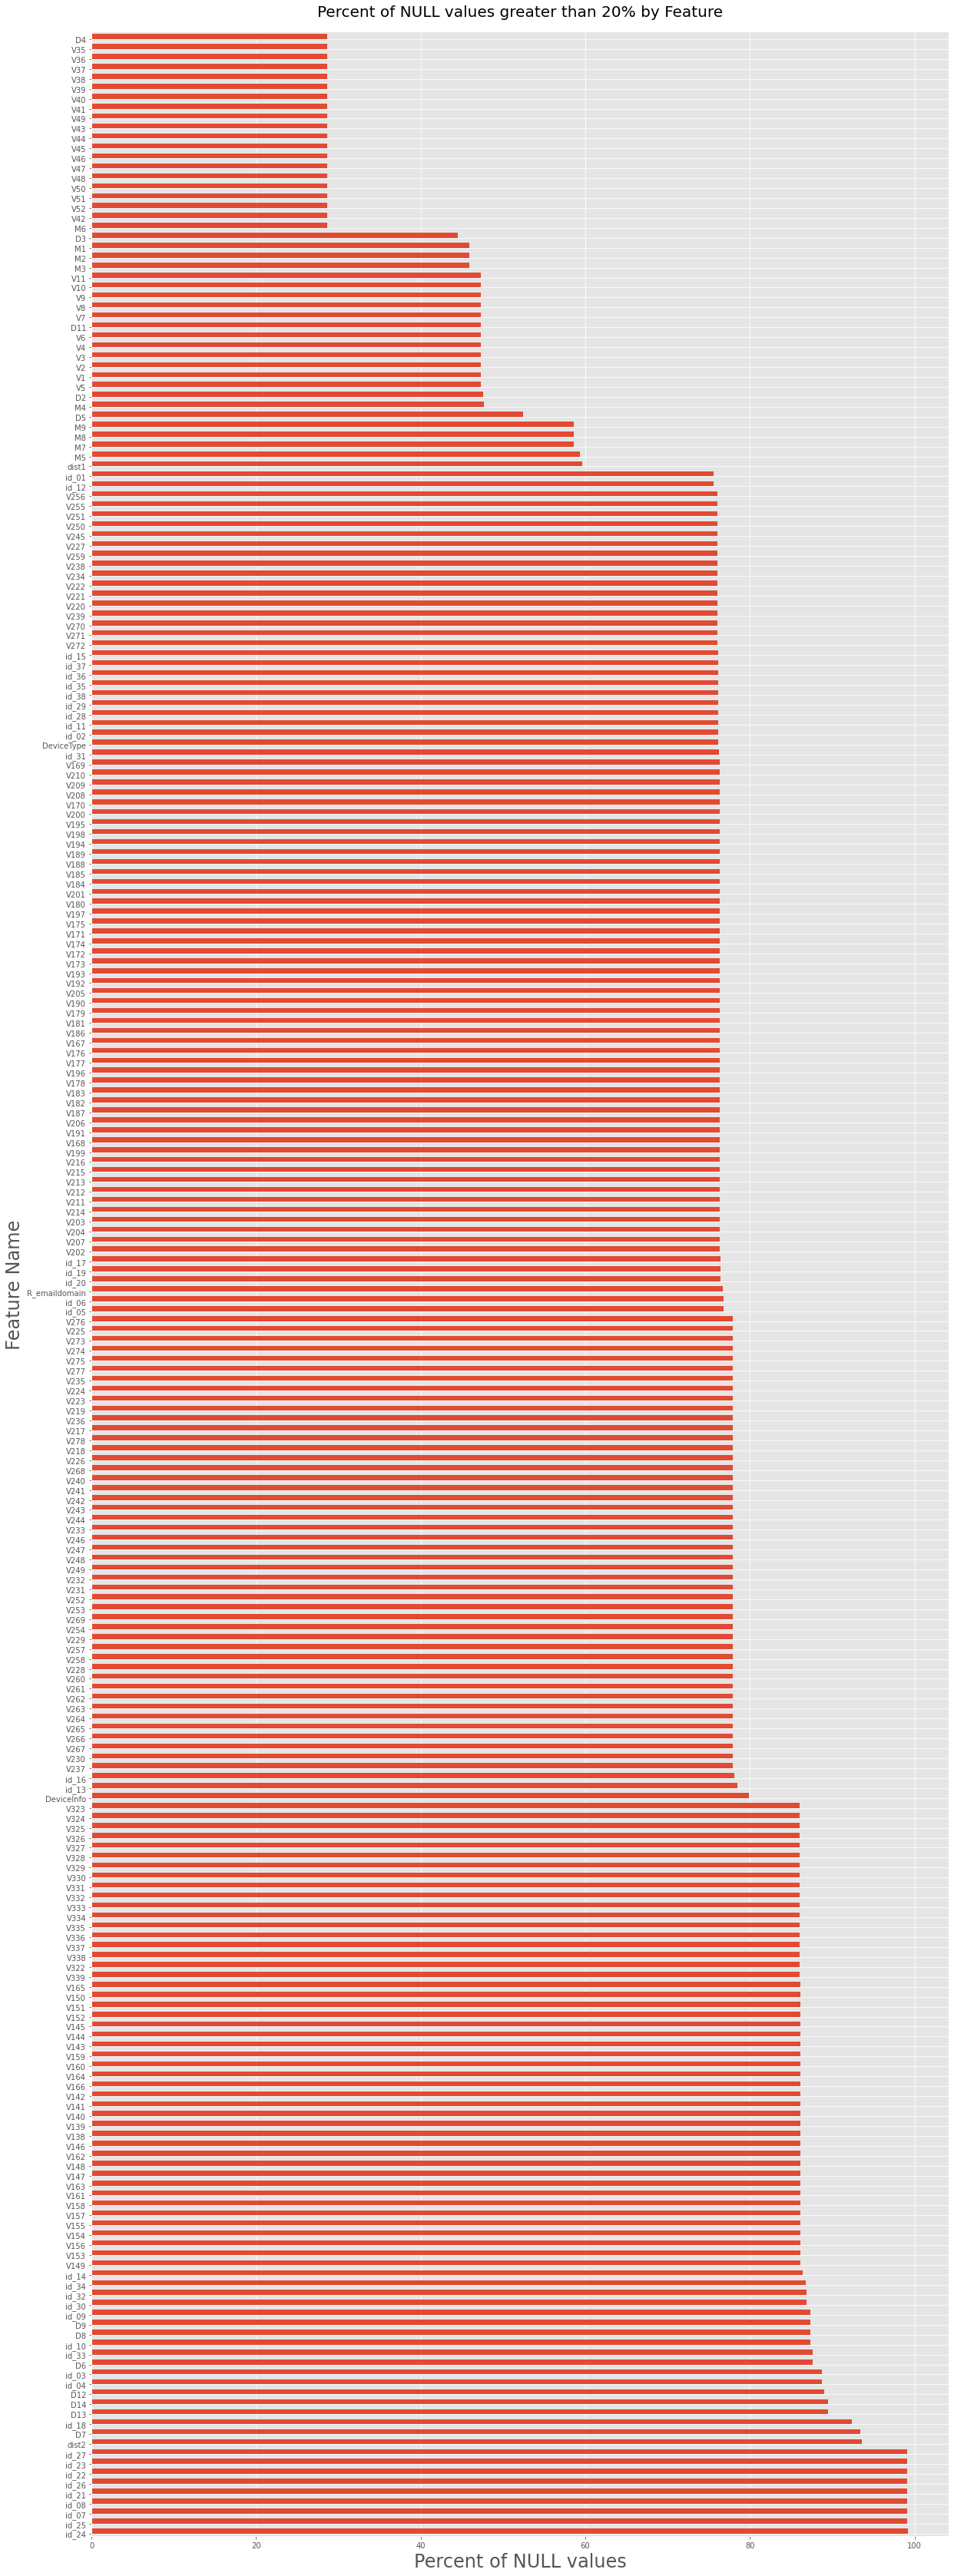

In [15]:
##################################################
# Create a list of lists using list comprehension.
##################################################
null_list = \
[[a, round(b*100/len(train_merged),2)]
 for a,b in zip(train_merged.isnull().sum().sort_values(ascending=False).index,
                train_merged.isnull().sum().sort_values(ascending=False)) 
 if b*100/len(train_merged) > 20]

#for nl in null_list: print(nl)
plt.figure(figsize=(20,60))
plt.margins(y=0.001)
plt.barh(np.arange(len(null_list)), [b[1] for b in null_list], height=.5, align='edge')
plt.yticks(np.arange(len(null_list)), [b[0] for b in null_list])
plt.xlabel('Percent of NULL values', fontsize=24)
plt.ylabel('Feature Name', fontsize=24)
plt.title('Percent of NULL values greater than 20% by Feature', fontsize=20, pad=20.0)
plt.show()

In [16]:
md(f'**<pre>Number of columns with over 20% NULL:   {len(null_list)}</pre>**')

**<pre>Number of columns with over 20% NULL:   252</pre>**

That's a lot of missing values! So it seems that we can probably remove most, if not all of them. Also, it seems that the features can generally be grouped by number of null values, as there seem many that contain the same amount of nulls.
___
### Check the TARGET distribution

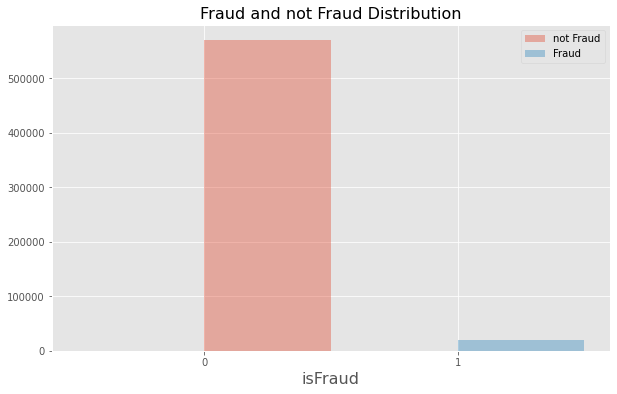

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(train_merged[train_merged['isFraud']==0]['isFraud'],label='not Fraud', kde=False, bins=2)
sns.distplot(train_merged[train_merged['isFraud']==1]['isFraud'],label='Fraud', kde=False, bins=2)
plt.title('Fraud and not Fraud Distribution',fontsize=16)
plt.xlabel('isFraud', fontsize=16)
plt.xticks(ticks=np.arange(0,2))
plt.legend()
plt.savefig('../images/unbalanced.png')
plt.show()

It is easy to see that these are very inbalanced classes. This will be dealt with later.
___
### Check Delta time related fields.
There are a number of features that represent a time interval, a delta. These will be explored below. The most important of these is the `Transaction` feature. As described by the data provider, these values a relative to a reference day. The first entry is 86400, which is the number of seconds in a day. So, it appears that every`TransactionDT` entry is th number of seconds since the start of the data.

In [74]:
train_merged[['TransactionDT'] + list(train_merged.columns[31:46])].describe().T[['min','max']]

,min,max
TransactionDT,86400.0,1.581113e+07
D1,0.0,6.400000e+02
D2,0.0,6.400000e+02
D3,0.0,8.190000e+02
D4,-122.0,8.690000e+02
D5,0.0,8.190000e+02
D6,-83.0,8.730000e+02
D7,0.0,8.430000e+02
D8,0.0,1.707792e+03
D9,0.0,9.583330e-01


There is a need for analysis to explain what each means. We know from the provider of the data that `TransactionDT` is the delta between transactions. Further, this delta is expressed in seconds. We know that $60x60x24 = 86400$ which is the number of seconds in a day. So `TransactionDT` starts at day 1. We have also been told that the 15 'D' features are deltas as well.
___
**Compare the `TransactionDT` distributions for train and test**


**The sample collection period spans 395.99936342592594 days**

Text(0.5, 0, 'TransactionDT')

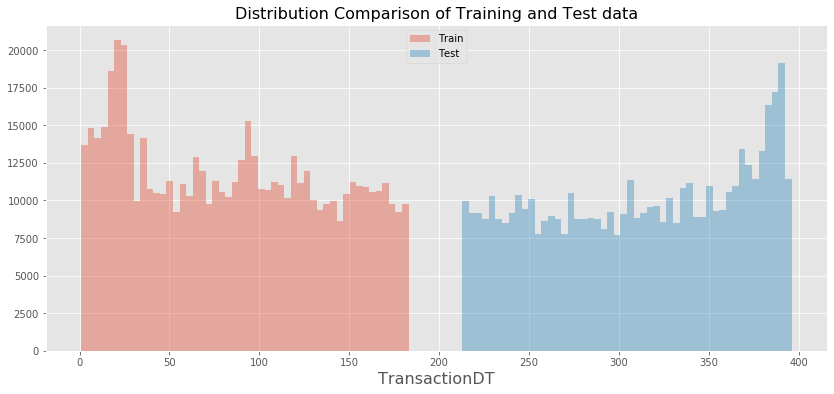

In [75]:
md(f"\n**The sample collection period spans {(test_merged['TransactionDT']/86400).max()} days**")
plt.figure(figsize=(14,6))
sns.distplot(train_merged['TransactionDT']/86400, kde=False, label='Train')
sns.distplot(test_merged['TransactionDT']/86400, kde=False, label='Test')
plt.legend(loc=9)
plt.title('Distribution Comparison of Training and Test data', fontsize=16)
plt.xlabel('TransactionDT', fontsize=16)

In [76]:
##########################################################################
# Take max value of TransactionDT from Train and the min from Test
# Subtract the the max from Train from the min of Test and devide by 86400
# This gives number of days between end of Train and start of Test
##########################################################################

train_dt_min_max = (train_merged['TransactionDT'].min(), train_merged['TransactionDT'].max())
test_dt_min_max = (test_merged['TransactionDT'].min(), test_merged['TransactionDT'].max())

print(f'TrainDT MIN: {train_dt_min_max[0]/86400:<8.2f} | TrainDT MAX: {train_dt_min_max[1]/86400:<8.2f}')
print(f'TestnDT MIN: {test_dt_min_max[0]/86400:<8.2f} |  TestDT MAX: {test_dt_min_max[1]/86400:<8.2f}')
md(f'**Days between train end and test start: {(test_dt_min_max[0]-train_dt_min_max[1])/86400:.2f}**')

TrainDT MIN: 1.00     | TrainDT MAX: 183.00  
TestnDT MIN: 213.00   |  TestDT MAX: 396.00  


**Days between train end and test start: 30.00**

**<p>Covarient shift?</p>**<p></p>
The time period for the collections of the samples do not overlap, indicating a covarient shift. In other words, the samples come from different distributions. <p></p>
**Covariate Shift Feature Importance**<p></p>
The chart show the degree of contribution to covariate shift by freature. The highest scores are the biggest contributors. We could move to distribution convergence by eliminating the biggest offenders, but that might mean loss of information. Or we could use those features to engineer new features that retain the information.

In [77]:
cov, list_to_discart = adversarial_validation(train_merged.drop(['isFraud'],axis=1), test_merged)
#train_merged.head()

feature: TransactionID covariate shift: 0.9999922099909104
feature: TransactionDT covariate shift: 0.9999922099909103

features to drop: ['TransactionDT', 'TransactionID']


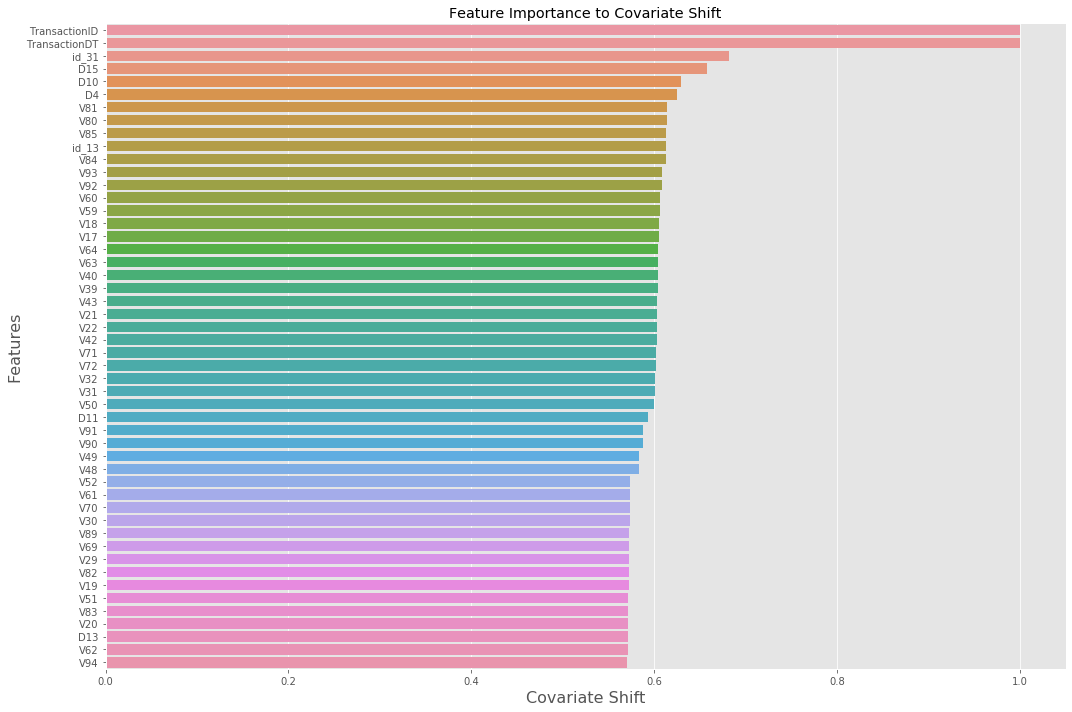

In [78]:
plt.figure(figsize=(15,10))
plot_fi = sns.barplot(x=cov.sort_values(ascending=False)[:50], y=cov.sort_values(ascending=False)[:50].index)
plot_fi.set_title('Feature Importance to Covariate Shift')
plt.xlabel('Covariate Shift', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.tight_layout()
plt.show()


### Check the `D` features

In [79]:
md('**Number of missing values in "D" features**:')
d_cols = ['D'+str(d) for d in range(1,16)]
for p in [c.ljust(6) for c in d_cols]: print(p, end=' ')
print('')
print('-------'.ljust(6)*15)
for t in [train_merged[nc].isnull().sum() for nc in d_cols]: print(f'{t:<6}', end=' ')

**Number of missing values in "D" features**:

D1     D2     D3     D4     D5     D6     D7     D8     D9     D10    D11    D12    D13    D14    D15    
---------------------------------------------------------------------------------------------------------
1269   280797 262878 168922 309841 517353 551623 515614 515614 76022  279287 525823 528588 528353 89113  

D1 and D15 have the least number of messing values. But what do they mean? Before going there, it is necessary to have a look at the `card` features.
___
### Check the `Card` features
**Data Type: Categorical**<p></p>
The `card`features contain various credit card information. Some obvious such as `card4` and `card6`. and the other 4 not so much. But some assumptions can be made, such as that `card1` is probably related to cardholder identity.

In [80]:
card_cols = ['card'+str(c)  for c in range(1,7)]
train_merged[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


**Unique values for card features**

In [81]:
md('Number of unique values:')
for item in {i:train_merged[i].nunique() for i in card_cols}.items(): 
    print(item[0],item[1])

Number of unique values:

card1 13553
card2 500
card3 114
card4 4
card5 119
card6 4


**Check for NULL**

In [82]:
md('Percent NULL:')
print(train_merged[card_cols].isnull().sum()/train_merged.shape[0]*100)

Percent NULL:

card1    0.000000
card2    1.512683
card3    0.265012
card4    0.267044
card5    0.721204
card6    0.266028
dtype: float64


`card1` contains no missing values, while `card2` has the most, but that's only about 1.5% of all values. 
___
The objective is to determine if an account is fraudulant, and not if an individual transaction is. So the goal should be to group all of the transactions conducted with a particular card (account) together and look for patterns from there. There are accounts that have only a single transaction associated with them, while others have thousands. Below is an example of what some of the acounts looks like. These are cards that contain 7 transactions apiece.

In [83]:

grouped = train_merged.groupby(card_cols, as_index=False)['TransactionID'].count()
grouped[grouped['TransactionID']==7].rename(columns={'TransactionID':'Transactions_count'}).head(5)
#grouped[grouped['TransactionID'].between(7,8)].head()

,card1,card2,card3,card4,card5,card6,Transactions_count
17,1021,555.0,150.0,visa,226.0,debit,7
49,1057,310.0,150.0,mastercard,224.0,debit,7
146,1189,555.0,150.0,visa,226.0,debit,7
148,1191,555.0,191.0,visa,102.0,credit,7
260,1323,268.0,150.0,visa,100.0,debit,7


Now a closer look at one of these accounts. What's interesting below is that for any `card1`, the values of `card2` and `card3` do not change. So it seems that combining all the card values will give us a unique combination. This should also make it possible to fill in missing values base on the other values within the group. 

In [84]:

train_merged[train_merged['card1']==1191][['TransactionID', 'TransactionAmt','TransactionDT','isFraud'] + card_cols]

,TransactionID,TransactionAmt,TransactionDT,isFraud,card1,card2,card3,card4,card5,card6
1169,2988169,80.000,125042,1,1191,555.0,191.0,visa,102.0,credit
1173,2988173,97.000,125295,1,1191,555.0,191.0,visa,102.0,credit
10827,2997827,60.000,327873,0,1191,555.0,191.0,visa,102.0,credit
544524,3531524,41.069,14356966,1,1191,555.0,191.0,visa,102.0,credit
545040,3532040,4.109,14393298,1,1191,555.0,191.0,visa,102.0,credit
545057,3532057,59.759,14393831,1,1191,555.0,191.0,visa,102.0,credit
545131,3532131,59.759,14394871,1,1191,555.0,191.0,visa,102.0,credit


___
And this is what the time delta values appear like for a particular `card1` group.

In [85]:

train_merged.groupby(['card1']).get_group(1189)[['TransactionID', 'TransactionAmt','TransactionDT','isFraud','addr2'] + d_cols]

,TransactionID,TransactionAmt,TransactionDT,isFraud,addr2,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
26390,3013390,49.00,674535,0,87.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
139008,3126008,107.95,2838386,0,87.0,487.0,487.0,35.0,378.0,35.0,NaN,NaN,NaN,NaN,487.0,NaN,NaN,NaN,NaN,487.0
231943,3218943,107.95,5503310,0,87.0,518.0,518.0,31.0,518.0,433.0,NaN,NaN,NaN,NaN,518.0,487.0,NaN,NaN,NaN,518.0
302276,3289276,134.95,7484610,0,87.0,541.0,541.0,23.0,432.0,54.0,NaN,NaN,NaN,NaN,541.0,510.0,NaN,NaN,NaN,541.0
418508,3405508,100.00,10593623,0,87.0,577.0,577.0,36.0,0.0,NaN,NaN,NaN,NaN,NaN,577.0,546.0,NaN,NaN,NaN,577.0
508339,3495339,107.95,13307505,0,87.0,609.0,609.0,31.0,499.0,67.0,NaN,NaN,NaN,NaN,608.0,577.0,NaN,NaN,NaN,608.0
588122,3575122,107.95,15733056,0,87.0,637.0,637.0,28.0,527.0,28.0,NaN,NaN,NaN,NaN,636.0,605.0,NaN,NaN,NaN,636.0


`D1` is continuously incrementing by differring amounts. But if one looks closely, it appears that the amount of incrementation is contained within `D3`. So `D3` has a value equaled to the difference in `D1` from the previous transaction to the present. This pattern can be found in other groups, but I also found that there are many groups where this does not seem to hold. However, this obsevation appears to be the basis for many of the top solutions for this challange on Kaggle.<p></p>
The chart below shows that `D1` increases with an increase in `TransactionDT` while `D3` stays nearly constant. The value of `D3` depends on the amount of change in `D1`.

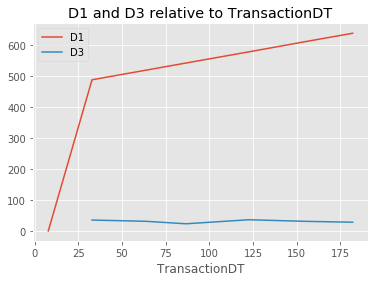

In [154]:
card1_1189 = train_merged.groupby(['card1']).get_group(1189)[['TransactionDT'] + d_cols]
tdt = card1_1189['TransactionDT']/86400
d1 = card1_1189['D1']
d3 = card1_1189['D3']
vline = card1_1189['D1'].min()
plt.plot(tdt, d1, label='D1')
plt.plot(tdt, d3, label='D3')
plt.xlabel('TransactionDT')
plt.title('D1 and D3 relative to TransactionDT')
plt.legend()
plt.show()

___
### Check `addr1`, `addr2` features
**Data Type: Categorical**<p></p>
As stated by the data provider, `addr1` represents a region and `addr2` represents a country. These can be combined with the `card` and `D` features to identify unique accounts.

In [87]:
train_merged[['addr1','addr2']].head()

,addr1,addr2
0,315.0,87.0
1,325.0,87.0
2,330.0,87.0
3,476.0,87.0
4,420.0,87.0


In [88]:
md('**Number of unique values**:')
md(f"addr1: `{train_merged['addr1'].nunique()}`, addr2: `{train_merged['addr2'].nunique()}`")
md(f"So, it seems that these transaction involve `{train_merged['addr1'].nunique()}` regions and `{train_merged['addr2'].nunique()}` countries.")      

**Number of unique values**:

addr1: `332`, addr2: `74`

So, it seems that these transaction involve `332` regions and `74` countries.

As demonstrated below, 95.66% of all fraud in the dataset have `addr2` as **87**. Now this may seem like the only feature needed in order to make a highly accurate prediction, but one needs to remember that the train and test samples come from very different distributions.

In [89]:
train_merged[train_merged['isFraud'] == 1]['addr2'].value_counts(normalize=True)

87.0    0.965563
60.0    0.021591
96.0    0.006887
65.0    0.003405
10.0    0.000619
32.0    0.000464
51.0    0.000310
46.0    0.000232
54.0    0.000155
92.0    0.000155
38.0    0.000155
36.0    0.000077
82.0    0.000077
68.0    0.000077
75.0    0.000077
73.0    0.000077
29.0    0.000077
Name: addr2, dtype: float64

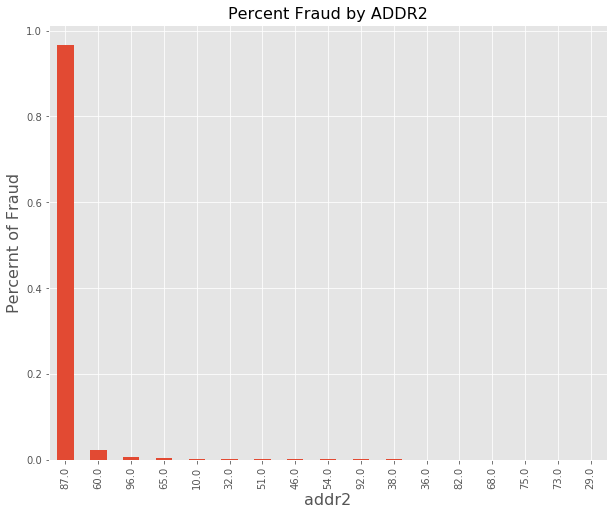

In [90]:
plt.figure(figsize=(10,8))
train_merged[train_merged['isFraud'] == 1]['addr2'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('addr2', fontsize=16)
plt.ylabel('Percernt of Fraud', fontsize=16)
plt.title('Percent Fraud by ADDR2', fontsize=16)
plt.show()

___
### Check `dist1`, `dist2` features
These are described as distances between points. What point? Could be billing address and shipping address. Or perhaps from distribution point to delivery point. In fact, based on the description, it could be any number of end points.

In [91]:
train_merged[['dist1','dist2']].head()

,dist1,dist2
0,19.0,NaN
1,NaN,NaN
2,287.0,NaN
3,NaN,NaN
4,NaN,NaN


In [92]:
md('**Number of unique values**:')
md(f"dist1: `{train_merged['dist1'].nunique()}`, dist2: `{train_merged['dist2'].nunique()}`")


**Number of unique values**:

dist1: `2651`, dist2: `1751`

In [93]:
md('**Percent of NULL:**')
train_merged[['dist1','dist2']].isnull().sum()/train_merged.shape[0]*100

**Percent of NULL:**

dist1    59.652352
dist2    93.628374
dtype: float64

Both of these feature have very high precentages of NULL values. Especially `dist2` with 93.63%.
Percent Fraud by dist1

**Percent Fraud by `dist1`**<p></p>
The plot below shows that the largest number of fraud occurs where `dist1` is the lowest.

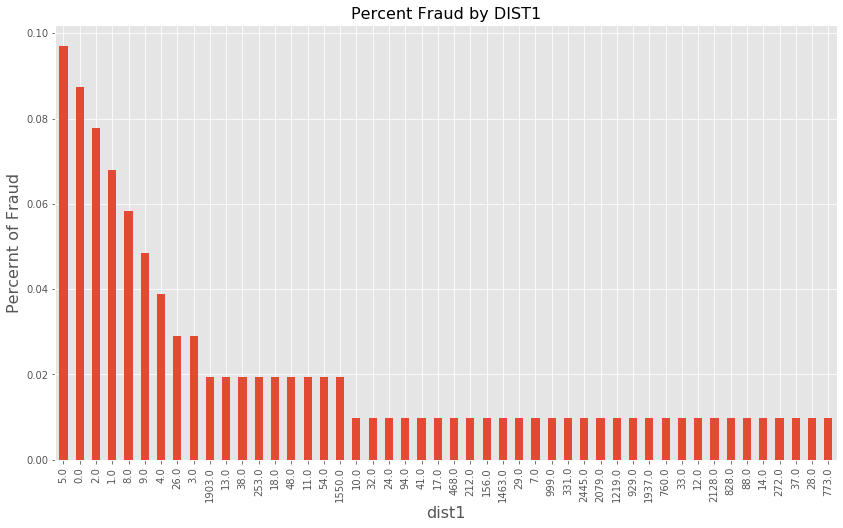

In [94]:
plt.figure(figsize=(14,8))
train_merged[train_merged['isFraud'] == 1]['dist1'][:500].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('dist1', fontsize=16)
plt.ylabel('Percernt of Fraud', fontsize=16)
plt.title('Percent Fraud by DIST1', fontsize=16)
plt.show()

___
### Check `P_emaildomain`, `R_emaildomain` features
**Data Type: Categorical**<p></p>

In [95]:
train_merged['P_emaildomain'].unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [96]:
train_merged['R_emaildomain'].unique()

array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'prodigy.net.mx', 'comcast.net', 'live.com.mx',
       'icloud.com', 'yahoo.com', 'aol.com', 'juno.com', 'att.net',
       'verizon.net', 'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com',
       'ymail.com', 'hotmail.es', 'msn.com', 'optonline.net', 'live.com',
       'gmx.de', 'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'yahoo.co.uk', 'windstream.net', 'suddenlink.net',
       'hotmail.fr', 'ptd.net', 'hotmail.de', 'frontier.com',
       'cfl.rr.com', 'hotmail.co.uk', 'netzero.com', 'netzero.net',
       'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

**Percent of NULL**

In [97]:
train_merged[['P_emaildomain','R_emaildomain']].isnull().sum()/train_merged.shape[0]*100

P_emaildomain    15.994852
R_emaildomain    76.751617
dtype: float64

### Check `ProductCD` feature
**Data Type: Categorical**<p></p>
These are the product codes for the items bought. 

In [98]:
train_merged['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [99]:
md(f'Percent Fraud by Product Code:')
train_merged[train_merged['isFraud']==1]['ProductCD'].value_counts(normalize=True)*100

Percent Fraud by Product Code:

W    43.406088
C    38.755263
H     7.617481
R     6.901224
S     3.319944
Name: ProductCD, dtype: float64

### Check `C` features
**Missing Values**

In [100]:
md('**Number of missing values in "C" features**:')
c_cols = ['C'+str(d) for d in range(1,15)]
for p in [c.ljust(6) for c in c_cols]: print(p, end=' ')
print('')
print('-------'.ljust(6)*15)
for t in [train_merged[nc].isnull().sum() for nc in c_cols]: print(f'{t:<6}', end=' ')

**Number of missing values in "C" features**:

C1     C2     C3     C4     C5     C6     C7     C8     C9     C10    C11    C12    C13    C14    
---------------------------------------------------------------------------------------------------------
0      0      0      0      0      0      0      0      0      0      0      0      0      0      

**Number of Unique**

In [101]:
md('**Number of unique values in "C" features**:')
c_cols = ['C'+str(d) for d in range(1,15)]
for p in [c.ljust(6) for c in c_cols]: print(p, end=' ')
print('')
print('-------'.ljust(6)*15)
for t in [train_merged[nc].nunique() for nc in c_cols]: print(f'{t:<6}', end=' ')

**Number of unique values in "C" features**:

C1     C2     C3     C4     C5     C6     C7     C8     C9     C10    C11    C12    C13    C14    
---------------------------------------------------------------------------------------------------------
1657   1216   27     1260   319    1328   1103   1253   205    1231   1476   1199   1597   1108   

**Check for Patterns with `C` features**

In [102]:

train_merged[train_merged['card1']==1191][['TransactionID', 'TransactionAmt','TransactionDT','isFraud'] + c_cols]

,TransactionID,TransactionAmt,TransactionDT,isFraud,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
1169,2988169,80.000,125042,1,9.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,1.0,0.0,22.0,6.0
1173,2988173,97.000,125295,1,9.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,8.0,0.0,1.0,0.0,22.0,6.0
10827,2997827,60.000,327873,0,9.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,8.0,0.0,1.0,0.0,23.0,6.0
544524,3531524,41.069,14356966,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
545040,3532040,4.109,14393298,1,2.0,2.0,0.0,2.0,0.0,2.0,2.0,3.0,0.0,1.0,2.0,2.0,1.0,1.0
545057,3532057,59.759,14393831,1,2.0,3.0,0.0,3.0,0.0,3.0,3.0,4.0,0.0,1.0,3.0,3.0,1.0,1.0
545131,3532131,59.759,14394871,1,4.0,5.0,0.0,4.0,0.0,4.0,4.0,8.0,0.0,1.0,5.0,5.0,2.0,2.0


Grouping on `card1` and viewing the counters, it appears that all counters reset and start to count up with `TransactionID` `3531524`. <p></p>
So, there were 162 days between transactions. What could this mean? Does it happen with other card numbers?

In [103]:
t1 = train_merged[train_merged['TransactionDT']==14356966]['TransactionDT'].values/86400
t2 = train_merged[train_merged['TransactionDT']==327873]['TransactionDT'].values/86400
md(f'There are `{np.round((t1-t2)[0],2)}` days between transactions.')

There are `162.37` days between transactions.

### Check `M` features
**Data Type: Categorical**<p></p>
**Missing Values**<p></p>
There is a high volumn of NaNs across all `M` features. Recall that these features are suppose to record matches in information.

In [104]:
md('**Number of missing values in "M" features**:')
m_cols = ['M'+str(d) for d in range(1,10)]
for p in [c.ljust(6) for c in m_cols]: print(p, end=' ')
print('')
print('-------'.ljust(6)*15)
for t in [train_merged[nc].isnull().sum() for nc in m_cols]: print(f'{t:<6}', end=' ')

**Number of missing values in "M" features**:

M1     M2     M3     M4     M5     M6     M7     M8     M9     
---------------------------------------------------------------------------------------------------------
271100 271100 271100 281444 350482 169360 346265 346252 346252 

**check for patterns with repect to `card1` groups**

In [105]:

train_merged[train_merged['card1']==1191][['TransactionID', 'TransactionAmt','TransactionDT','isFraud'] + m_cols]

,TransactionID,TransactionAmt,TransactionDT,isFraud,M1,M2,M3,M4,M5,M6,M7,M8,M9
1169,2988169,80.000,125042,1,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
1173,2988173,97.000,125295,1,T,F,F,M0,F,F,NaN,NaN,NaN
10827,2997827,60.000,327873,0,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
544524,3531524,41.069,14356966,1,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
545040,3532040,4.109,14393298,1,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
545057,3532057,59.759,14393831,1,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
545131,3532131,59.759,14394871,1,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN


### Check `id` features
These features are of great interest in that they hold network connection information and digital signiture information. These feature should be quite valuable in establishing identity. However they contain a large amount of missing data.
You can go back to the chart [here](#Check-for-Percent-of-Missing-Values-Over-20%) to see the percent of missing values for each feature. <p></p>
What some of these features represent is very obvious. You can go [here](#Check-Unique-Values) to view the values for each feature. You'll find the `id` features towards the end (scroll down). Below are some of the more interesting.

In [106]:
id_cols = [f'id_{str(i).zfill(2)}' for i in range(1,39)]

for col, values in train_merged[['id_23','id_27','id_28','id_29','id_30','id_31','id_32','id_33','id_34']].iteritems():
    num_uniques = values.nunique()
    print (f'{col}: {num_uniques}')
    print (values.unique())
    print ('')


id_23: 3
[nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']

id_27: 2
[nan 'Found' 'NotFound']

id_28: 2
[nan 'New' 'Found']

id_29: 2
[nan 'NotFound' 'Found']

id_30: 75
[nan 'Android 7.0' 'iOS 11.1.2' 'Mac OS X 10_11_6' 'Windows 10' 'Android'
 'Linux' 'iOS 11.0.3' 'Mac OS X 10_7_5' 'Mac OS X 10_12_6'
 'Mac OS X 10_13_1' 'iOS 11.1.0' 'Mac OS X 10_9_5' 'Windows 7'
 'Windows 8.1' 'Mac' 'iOS 10.3.3' 'Mac OS X 10.12' 'Mac OS X 10_10_5'
 'Mac OS X 10_11_5' 'iOS 9.3.5' 'Android 5.1.1' 'Android 7.1.1'
 'Android 6.0' 'iOS 10.3.1' 'Mac OS X 10.9' 'iOS 11.1.1' 'Windows Vista'
 'iOS 10.3.2' 'iOS 11.0.2' 'Mac OS X 10.11' 'Android 8.0.0' 'iOS 10.2.0'
 'iOS 10.2.1' 'iOS 11.0.0' 'Mac OS X 10.10' 'Mac OS X 10_12_3'
 'Mac OS X 10_12' 'Android 6.0.1' 'iOS' 'Mac OS X 10.13'
 'Mac OS X 10_12_5' 'Mac OS X 10_8_5' 'iOS 11.0.1' 'iOS 10.0.2'
 'Android 5.0.2' 'Windows XP' 'iOS 11.2.0' 'Mac OS X 10.6' 'Windows 8'
 'Mac OS X 10_6_8' 'Mac OS X 10_11_4' 'Mac OS X 10_12_1' 'iOS 10.1.1'
 'Mac OS X 

`id_23` reports the proxy type. `id_30` is the operating system. `id_31` is the browser. The values in `id_32` are interesting. The values in `id_33` look like screen resolutions. And `id_34` has something called match status. Not sure what that is.

In [107]:
md(f' Percent proxy type used in fraud:')
print(f"{train_merged[train_merged['isFraud']==True]['id_23'].value_counts(normalize=True)*100}")

 Percent proxy type used in fraud:

IP_PROXY:TRANSPARENT    57.511737
IP_PROXY:ANONYMOUS      34.507042
IP_PROXY:HIDDEN          7.981221
Name: id_23, dtype: float64


In [108]:
md(f'Percent of fraud by OS:')
print(f"{train_merged[train_merged['isFraud']==1]['id_30'].value_counts(normalize=True)*100}")

Percent of fraud by OS:

Windows 10          19.087740
Windows 7           12.550843
iOS 11.2.1           5.316676
Android 7.0          4.822777
iOS 11.2.5           4.241720
iOS 11.3.0           4.009297
Windows 8.1          3.864033
iOS 11.1.2           3.776874
Android              3.312028
iOS 11.2.2           3.079605
Android 5.1.1        2.934340
iOS 11.2.6           2.730970
iOS 10.3.3           2.585706
Linux                2.469494
iOS 11.2.0           2.091807
Android 7.1.1        1.946543
iOS 11.1.1           1.423591
Android 6.0.1        1.394538
iOS 11.1.0           1.394538
Mac OS X 10_10_5     1.191168
Mac OS X 10_13_3     1.133062
Mac OS X 10_12_6     1.045904
Mac OS X 10_13_4     0.987798
Mac OS X 10_9_5      0.987798
iOS 11.0.3           0.900639
iOS 10.3.2           0.842533
Mac OS X 10_11_6     0.842533
iOS 11.0.1           0.726322
iOS 10.2.1           0.726322
Windows Vista        0.668216
Mac OS X 10_13_2     0.639163
Windows 8            0.610110
Mac OS X 10_13_1     0.552005
Android 8.

In [163]:
md(f' Percent of fraud by browser:')
print(f"{train_merged[train_merged['isFraud']==1]['id_31'].value_counts(normalize=True)*100}")

 Percent of fraud by browser:

chrome 63.0                   13.454480
mobile safari generic         10.258706
mobile safari 11.0             7.537374
chrome generic                 7.188255
chrome 65.0                    6.078238
chrome 63.0 for android        5.845493
chrome 64.0                    5.505326
chrome 64.0 for android        4.941366
chrome 65.0 for android        4.395309
chrome 66.0                    3.562797
chrome 66.0 for android        2.730284
chrome 62.0                    2.676573
safari generic                 1.835109
firefox 57.0                   1.647122
ie 11.0 for desktop            1.566556
chrome 62.0 for android        1.441232
firefox                        1.315907
mobile safari 10.0             1.145824
chrome generic for android     1.136872
edge 16.0                      1.029451
firefox 59.0                   0.769851
firefox 58.0                   0.689285
samsung browser 6.2            0.671381
chrome 61.0 for android        0.644526
android webview 4.0            0.617671


In [110]:
md(f' Percent of fraud by screen resolution:')
print(f"{train_merged[train_merged['isFraud']==True]['id_33'].value_counts(normalize=True)*100}")

 Percent of fraud by screen resolution:

1366x768     14.659530
1920x1080    14.570324
2208x1242    14.332441
1334x750     11.329170
1280x720      5.382099
2436x1125     4.995540
1440x900      3.806125
1600x900      3.360095
1280x800      3.062742
855x480       2.824859
1136x640      2.022004
2048x1536     1.932798
2001x1125     1.813857
1024x600      1.694915
1280x1024     1.575974
2560x1600     1.278620
1024x768      1.011002
2880x1800     0.862325
2220x1080     0.862325
1680x1050     0.773119
801x480       0.743384
1920x1200     0.654178
3360x2100     0.475766
1364x768      0.475766
1365x768      0.475766
2560x1440     0.416295
2220x1081     0.416295
1600x1200     0.416295
1360x768      0.327089
2732x2048     0.267618
3840x2160     0.267618
640x360       0.237883
1024x552      0.237883
2224x1668     0.208147
5120x2880     0.208147
2960x1440     0.208147
1536x864      0.148677
1366x767      0.148677
2961x1442     0.148677
1920x975      0.148677
3201x1800     0.118941
4500x3000     0.118941
960x540       0.118941
3000x2000  

### Check `DeviceType` feature
**Data Type: Categorical**<p></p>

In [111]:
train_merged['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

In [112]:
md(f'Percent of fraud by Device Type:')
train_merged[train_merged['isFraud']==1]['DeviceType'].value_counts(normalize=True)*100

Percent of fraud by Device Type:

mobile     50.45937
desktop    49.54063
Name: DeviceType, dtype: float64

### Check `Deviceinfo` feature
**Data Type: Categorical**<p></p>

In [113]:
train_merged['DeviceInfo'].value_counts()

Windows                                        47722
iOS Device                                     19782
MacOS                                          12573
Trident/7.0                                     7440
rv:11.0                                         1901
rv:57.0                                          962
SM-J700M Build/MMB29K                            549
SM-G610M Build/MMB29K                            461
SM-G531H Build/LMY48B                            410
rv:59.0                                          362
SM-G935F Build/NRD90M                            334
SM-G955U Build/NRD90M                            328
SM-G532M Build/MMB29T                            316
ALE-L23 Build/HuaweiALE-L23                      312
SM-G950U Build/NRD90M                            290
SM-G930V Build/NRD90M                            274
rv:58.0                                          269
rv:52.0                                          256
SAMSUNG                                       

**Percent Fraud by Device:**<p></p>

In [114]:
md(f'Percent of fraud by Device:')
train_merged[train_merged['isFraud']==1]['DeviceInfo'].value_counts(normalize=True)*100

Percent of fraud by Device:

Windows                                   36.261183
iOS Device                                14.406878
MacOS                                      3.229929
hi6210sft Build/MRA58K                     2.091321
SM-A300H Build/LRX22G                      1.963518
rv:57.0                                    1.196700
Trident/7.0                                1.115371
rv:11.0                                    0.883002
LG-D320 Build/KOT49I.V10a                  0.708725
SM-J700M Build/MMB29K                      0.697107
SM-J320M Build/LMY47V                      0.662252
CRO-L03 Build/HUAWEICRO-L03                0.592541
KFFOWI Build/LVY48F                        0.592541
rv:58.0                                    0.569304
SM-A510M Build/MMB29K                      0.522830
rv:59.0                                    0.511212
Moto G (4) Build/NPJ25.93-14.7             0.464738
SM-G920P Build/NRD90M                      0.453120
SM-J500M Build/LMY48B                      0.453120
SM-G610M Bui

### Check `V` features
These features were engineered by internally at **Vesta**. Thee are 339 features in total. Most have a very high number of missing values. Go to the chart [here](#Check-for-Percent-of-Missing-Values-Over-20%) to see the percent of missing values for these features.<p></p>
These features have been obfuscated for security reasons and it is up to us to discern their meaning.

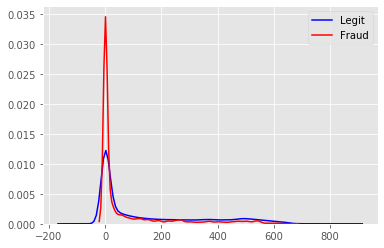

In [156]:
sns.kdeplot(train_merged[train_merged['isFraud']==0]['D4'], color='blue', label='Legit')
sns.kdeplot(train_merged[train_merged['isFraud']==1]['D4'], color='red', label='Fraud')